# **Predictive Modeling for Breast Cancer Using KNN, Naive Bayes, Decision Tree, Random Forest**

# Capstone Project 1

Name : CHEVALA AKSHAY RAJ

Batch : DST 20923

Start Date : SEPTEMBER 15 2023

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

uploaded = files.upload()


Saving wisc_bc_data.csv to wisc_bc_data.csv


In [4]:
file_name = next(iter(uploaded))
wbcd = pd.read_csv(file_name)

# Display the first few rows of the dataframe
wbcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis (EDA)

In [6]:
# Exploratory Data Analysis (EDA)
print(wbcd.info())
print(wbcd.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
print(wbcd[['radius_mean', 'area_mean', 'smoothness_mean']].describe())

       radius_mean    area_mean  smoothness_mean
count   569.000000   569.000000       569.000000
mean     14.127292   654.889104         0.096360
std       3.524049   351.914129         0.014064
min       6.981000   143.500000         0.052630
25%      11.700000   420.300000         0.086370
50%      13.370000   551.100000         0.095870
75%      15.780000   782.700000         0.105300
max      28.110000  2501.000000         0.163400


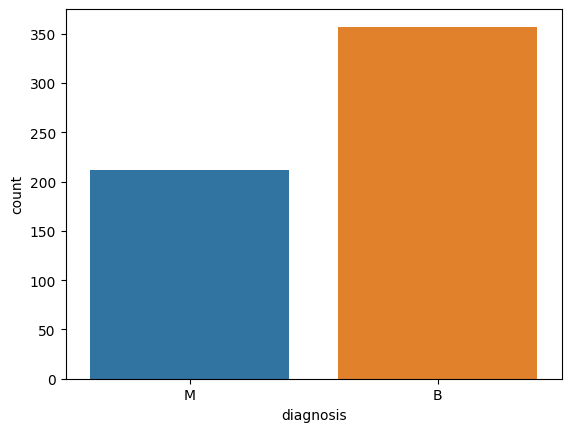

In [7]:
sns.countplot(x='diagnosis', data=wbcd)
plt.show()

In [8]:
wbcd = wbcd.drop(columns=['id'])
wbcd['diagnosis'] = wbcd['diagnosis'].map({'B': 0, 'M': 1})

# Handling missing values (if any)
wbcd = wbcd.dropna()

# Separate features and labels
X = wbcd.drop(columns=['diagnosis'])
y = wbcd['diagnosis']

# Standardize the features by Scaling


In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Spliting the data into train and test

In [10]:
np.random.seed(123)

In [91]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)


# **k-Nearest Neighbors (KNN)**

In [12]:
# Model training (k-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=21)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [13]:
# Model evaluation on the test set
y_pred = knn_model.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 96.49122807017544


In [16]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[73  0]
 [ 4 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      0.90      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



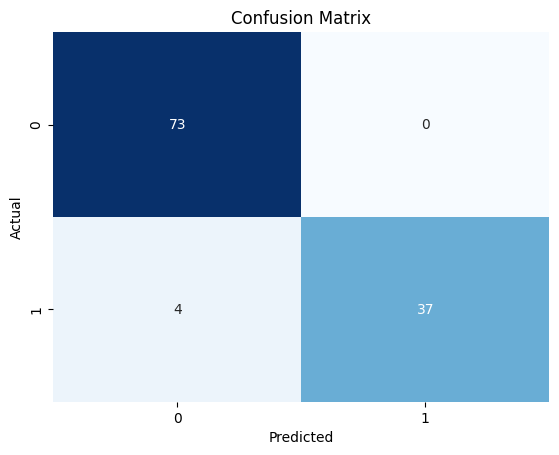

In [17]:
# Visualization of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Defining a function for confusion matrix and classification reports**

In [32]:
def visualize_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix ({model_name}):\n", conf_matrix)

    # Visualization of the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()


# **Decision Tree**

In [86]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier(random_state=123, max_depth=3)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy (Decision Tree):", accuracy_dt)


Accuracy (Decision Tree): 97.36842105263158


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix (Decision Tree):
 [[72  1]
 [ 2 39]]


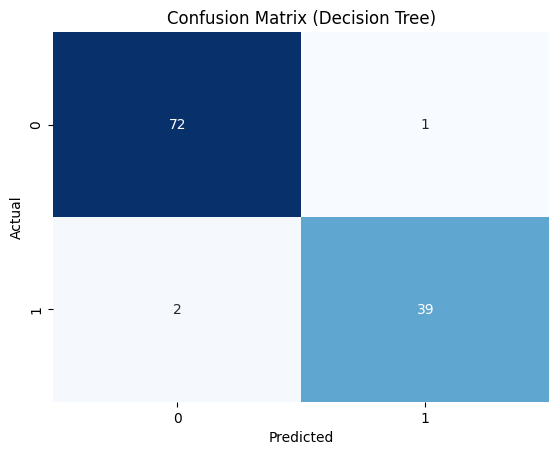

In [87]:
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
visualize_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

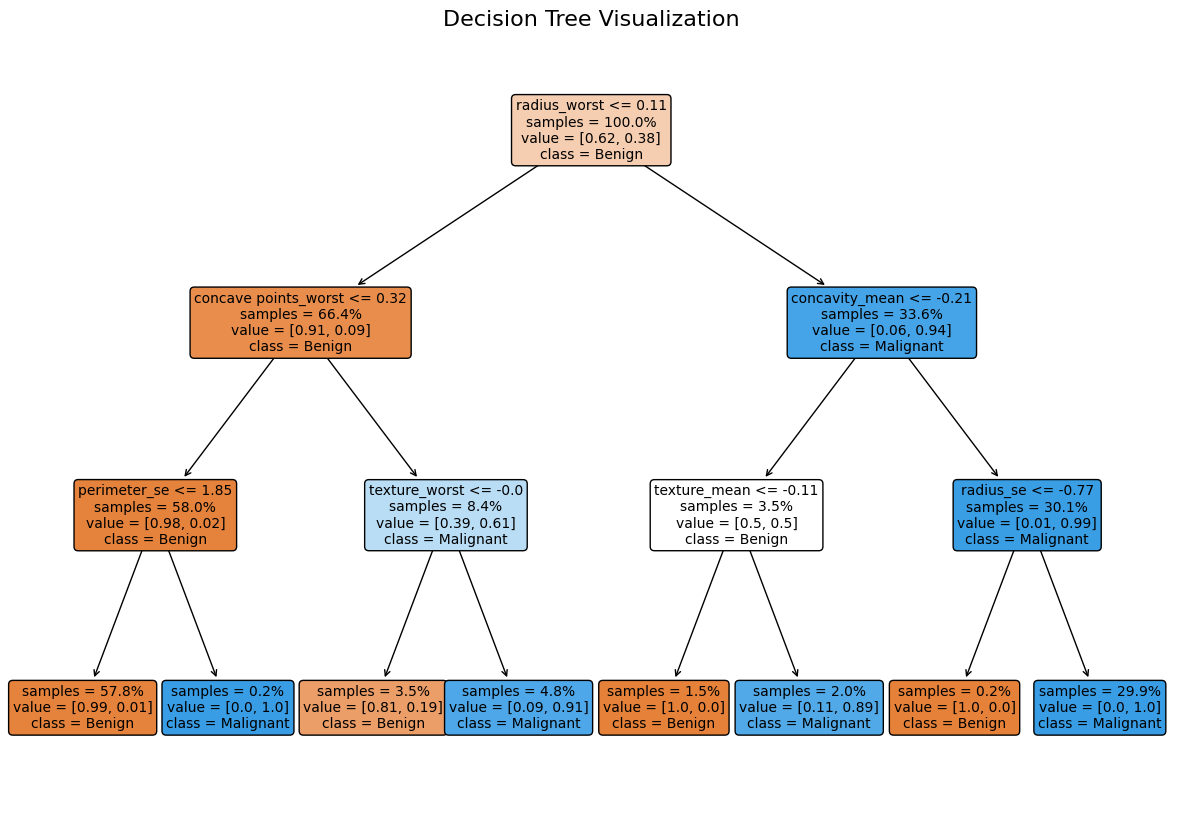

In [88]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'],
          rounded=True, fontsize=10, impurity=False, precision=2, proportion=True, max_depth=3)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

# **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 99.12280701754386


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix (Random Forest):
 [[73  0]
 [ 1 40]]


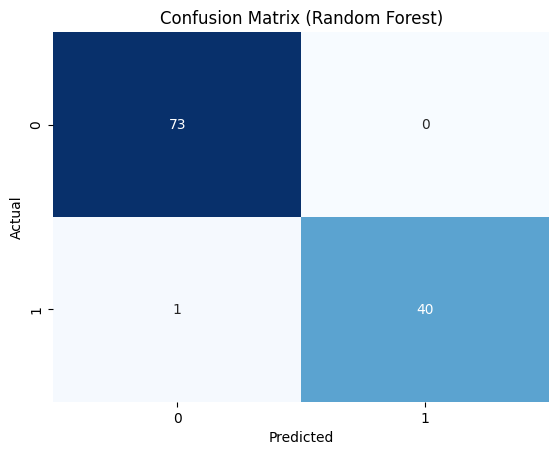

In [50]:
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
visualize_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# **Bernoulli Naive Bayes**

In [74]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred_bnb = bnb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_bnb)


In [80]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)*100
print(f"\nAccuracy for Bernoulli Naive Bayes: {accuracy_bnb}")


Accuracy for Bernoulli Naive Bayes: 96.49122807017544


Confusion Matrix for Bernoulli Naive Bayes:
[[72  1]
 [ 3 38]]

Classification Report for Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.97      0.93      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix (Bernoulli Naive Bayes):
 [[72  1]
 [ 3 38]]


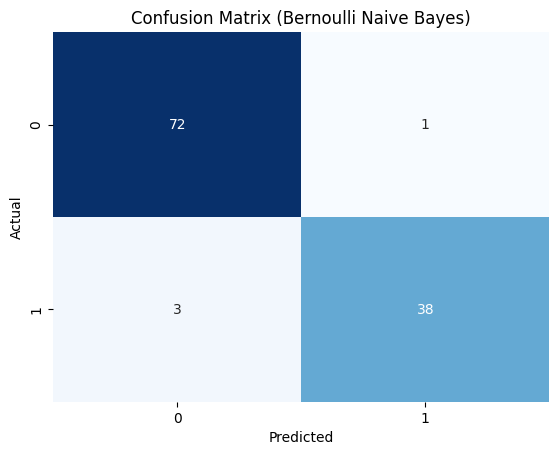

In [75]:

print(f"\nClassification Report for Bernoulli Naive Bayes:\n{classification_report(y_test, y_pred_bnb)}")
visualize_confusion_matrix(y_test, y_pred_bnb, "Bernoulli Naive Bayes")

# **Comparison of accuracy of all taken models**

In [92]:
results_df = pd.DataFrame({
    'Model': ['k-NN','Decision Tree', 'Random Forest', 'Bernoulli Naive Bayes'],
    'Accuracy': [accuracy,accuracy_dt, accuracy_rf, accuracy_bnb]
})

print(results_df)

                   Model   Accuracy
0                   k-NN  96.491228
1          Decision Tree  97.368421
2          Random Forest  99.122807
3  Bernoulli Naive Bayes  96.491228
